In [1]:
import sys,os
sys.path.append(os.path.abspath(".."))

#Laoding Raw UCI data
from data.uci.loader import load_uci_data
uci_df = load_uci_data("../data/raw/uci/uci_data.xls")

#Taking all features into X
from data.uci.feature_mapper import map_uci_features
X = map_uci_features(uci_df)

from data.uci.label_mapper import map_uci_label
y = map_uci_label(uci_df)



In [2]:
#So we have 30k datapoints - Customers
X.shape

(30000, 11)

In [3]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,any_delinquency,max_delay,avg_delay,total_bill,total_paid,payment_ratio
0,20000,2,2,1,24,1,2,0.666667,7704,689,0.089422
1,120000,2,2,2,26,1,2,0.666667,17077,5000,0.292774
2,90000,2,2,2,34,0,0,0.000000,101653,11018,0.108387
3,50000,2,2,1,37,0,0,0.000000,231334,8388,0.036259
4,50000,1,2,1,57,0,0,0.000000,109339,59049,0.540049


In [4]:
#We can see 22% of cstomer do defaults
y.value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [5]:
'''We will start with our Baseline Model - Logistic Regression'''

#The train,test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [6]:
#The training of logistic regression

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=1000,class_weight="balanced",solver="liblinear")
logistic_reg.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [7]:
#Finding out probability of default only
y_probability_log_reg = logistic_reg.predict_proba(X_test)[:,1]

In [8]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc_lr = roc_auc_score(y_test,y_probability_log_reg)
pr_auc_lr = average_precision_score(y_test,y_probability_log_reg)

roc_auc_lr,pr_auc_lr

(0.7087944969506075, 0.44444447964137057)

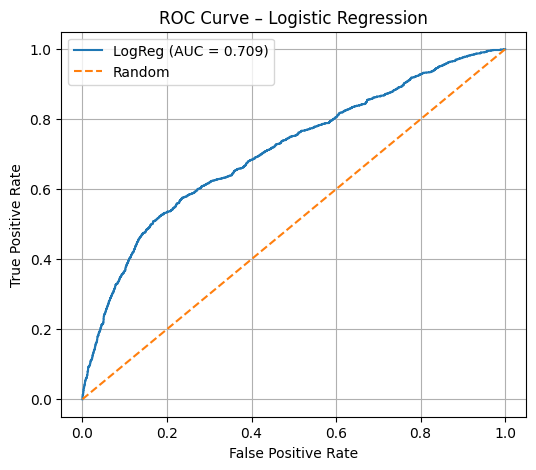

In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr,tpr,threshold = roc_curve(y_test,y_probability_log_reg)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_lr:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


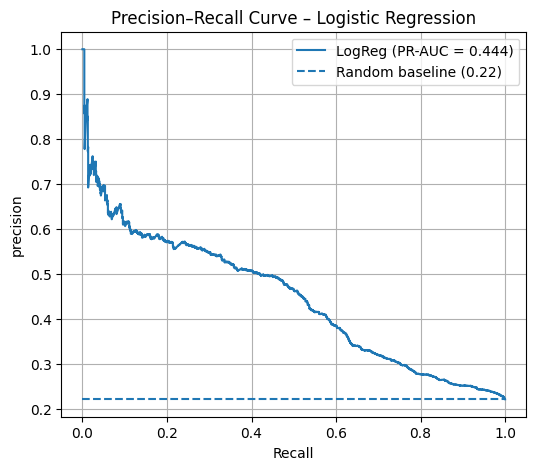

In [10]:
from sklearn.metrics import precision_recall_curve
precision,recall, threshold_pr = precision_recall_curve(y_test,y_probability_log_reg)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"LogReg (PR-AUC = {pr_auc_lr:.3f})")
baseline = y_test.mean()
plt.hlines(baseline,xmin=0,xmax=1,linestyles="--",label=f"Random baseline ({baseline:.2f})")
plt.xlabel("Recall")
plt.ylabel("precision")
plt.title("Precision–Recall Curve – Logistic Regression") 
plt.legend() 
plt.grid(True) 
plt.show()

In [11]:
'''Now we will start with our another baseline model - Decision Tree'''

from sklearn.tree import DecisionTreeClassifier

Dec_tree = DecisionTreeClassifier(max_depth=4,min_samples_leaf=100,class_weight='balanced',random_state=42)
Dec_tree.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",100
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [12]:
y_probability_dec_tree = Dec_tree.predict_proba(X_test)[:,1]

In [13]:
from sklearn.metrics import roc_auc_score, average_precision_score

roc_auc_tree = roc_auc_score(y_test, y_probability_dec_tree)
pr_auc_tree = average_precision_score(y_test, y_probability_dec_tree)

roc_auc_tree, pr_auc_tree


(0.7506407360922008, 0.482760525016397)

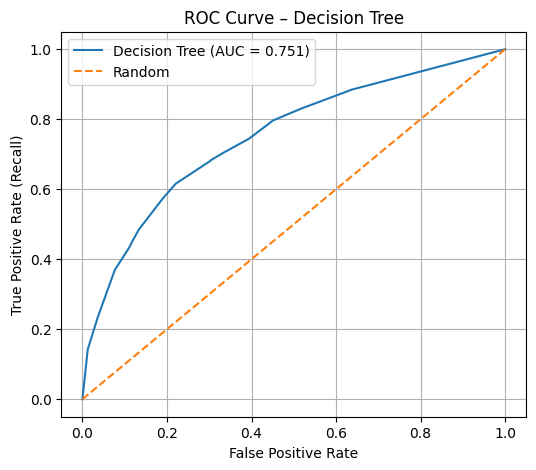

In [14]:
fpr_tree,tpr_tree,threshold_tree_roc = roc_curve(y_test,y_probability_dec_tree)
plt.figure(figsize=(6,5))
plt.plot(fpr_tree,tpr_tree,label=f"Decision Tree (AUC = {roc_auc_tree:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

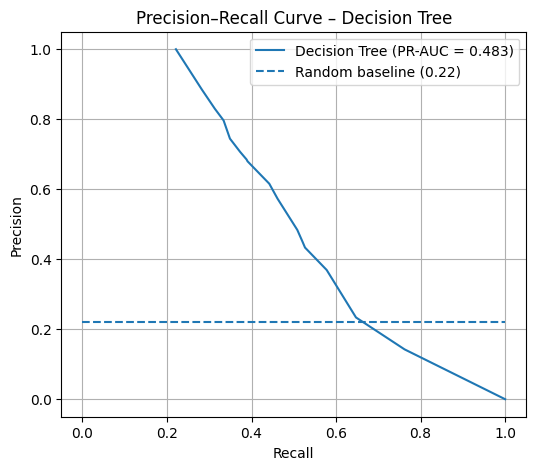

In [15]:
fpr_tree_pr,tpr_tree_pr,threshold_tree_pr = precision_recall_curve(y_test,y_probability_dec_tree)
plt.figure(figsize=(6,5))
plt.plot(fpr_tree_pr,tpr_tree_pr,label=f"Decision Tree (PR-AUC = {pr_auc_tree:.3f})")
baseline_tree = y_test.mean()
plt.hlines(baseline_tree,xmin=0,xmax=1,linestyles="--",label=f"Random baseline ({baseline:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

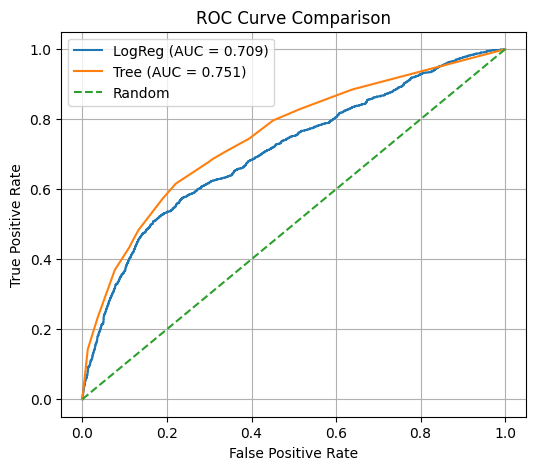

In [16]:
plt.figure(figsize=(6, 5))

plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_lr:.3f})")
plt.plot(fpr_tree, tpr_tree, label=f"Tree (AUC = {roc_auc_tree:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


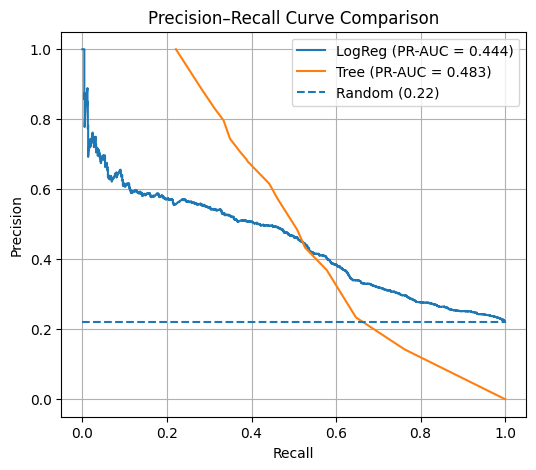

In [17]:
plt.figure(figsize=(6, 5))

plt.plot(recall, precision, label=f"LogReg (PR-AUC = {pr_auc_lr:.3f})")
plt.plot(fpr_tree_pr, tpr_tree_pr, label=f"Tree (PR-AUC = {pr_auc_tree:.3f})")

plt.hlines(
    baseline,
    xmin=0,
    xmax=1,
    linestyles="--",
    label=f"Random ({baseline:.2f})"
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
'''Now we will start with other models'''

#We will start with random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200,max_depth=8,min_samples_leaf=100,class_weight='balanced',random_state=42,n_jobs=-1)

In [19]:
random_forest.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",100
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [20]:
y_probability_rf = random_forest.predict_proba(X_test)[:,1]

In [21]:
roc_auc_rf = roc_auc_score(y_test,y_probability_rf)
pr_auc_rf = average_precision_score(y_test,y_probability_rf)

roc_auc_rf,pr_auc_rf

(0.7656854759443974, 0.5228802350561405)

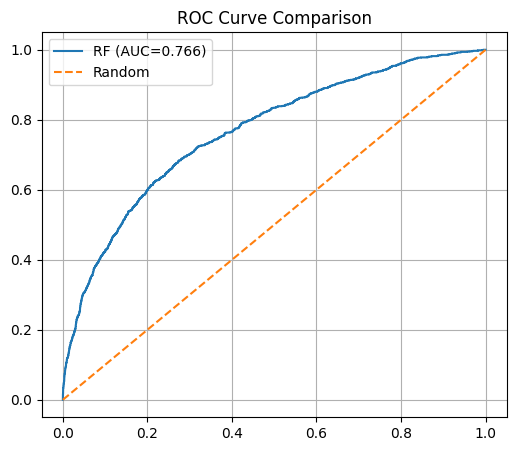

In [22]:
fpr_rf,tpr_rf,threshold = roc_curve(y_test,y_probability_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_auc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Random")
plt.legend()
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()

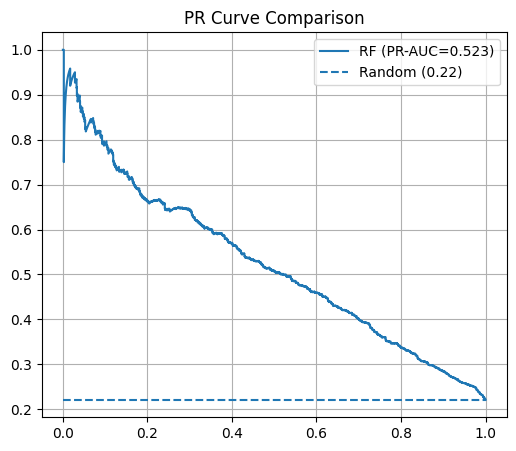

In [23]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_probability_rf)
plt.figure(figsize=(6,5))
plt.plot(recall_rf, precision_rf, label=f"RF (PR-AUC={pr_auc_rf:.3f})")
baseline = y_test.mean()
plt.hlines(baseline, 0, 1, linestyles="--", label=f"Random ({baseline:.2f})")
plt.legend()
plt.title("PR Curve Comparison")
plt.grid(True)
plt.show()

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

gradient_boost = HistGradientBoostingClassifier(max_depth=6,learning_rate=0.05,max_iter=300,min_samples_leaf=100,class_weight="balanced",random_state=42)

In [26]:
gradient_boost.fit(X_train,y_train)

,"loss loss: {'log_loss'}, default='log_loss'The loss function to use in the boosting process.For binary classification problems, 'log_loss' is also known as logistic loss,binomial deviance or binary crossentropy. Internally, the model fits one treeper boosting iteration and uses the logistic sigmoid function (expit) asinverse link function to compute the predicted positive class probability.For multiclass classification problems, 'log_loss' is also known as multinomialdeviance or categorical crossentropy. Internally, the model fits one tree perboosting iteration and per class and uses the softmax function as inverse linkfunction to compute the predicted probabilities of the classes.",'log_loss'
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.05
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees for binary classification. For multiclassclassification, `n_classes` trees per iteration are built.",300
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",6
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",100
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide `... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 1.4 Added `""from_dtype""` option... versionchanged:: 1.6 The default value changed from `None` to `""from_dtype""`.",'from_dty

In [27]:
y_probability_gradient_boost = gradient_boost.predict_proba(X_test)[:,1]

In [28]:
roc_auc_gb = roc_auc_score(y_test,y_probability_gradient_boost)
pr_auc_gb = average_precision_score(y_test,y_probability_gradient_boost)

roc_auc_gb,pr_auc_gb

(0.7664585682053954, 0.5276308673515681)